In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("cardio_train.csv", sep=";")

df["cardio"].value_counts()
df["cholesterol"].value_counts().values

array([52385,  9549,  8066])

C:\Users\sebas\AppData\Local\Temp\ipykernel_8456\1969424358.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[3, 0].set_xticklabels(["negative", "positive"])


Text(0.5, 1.0, 'Negative and positive percentage between men and women')

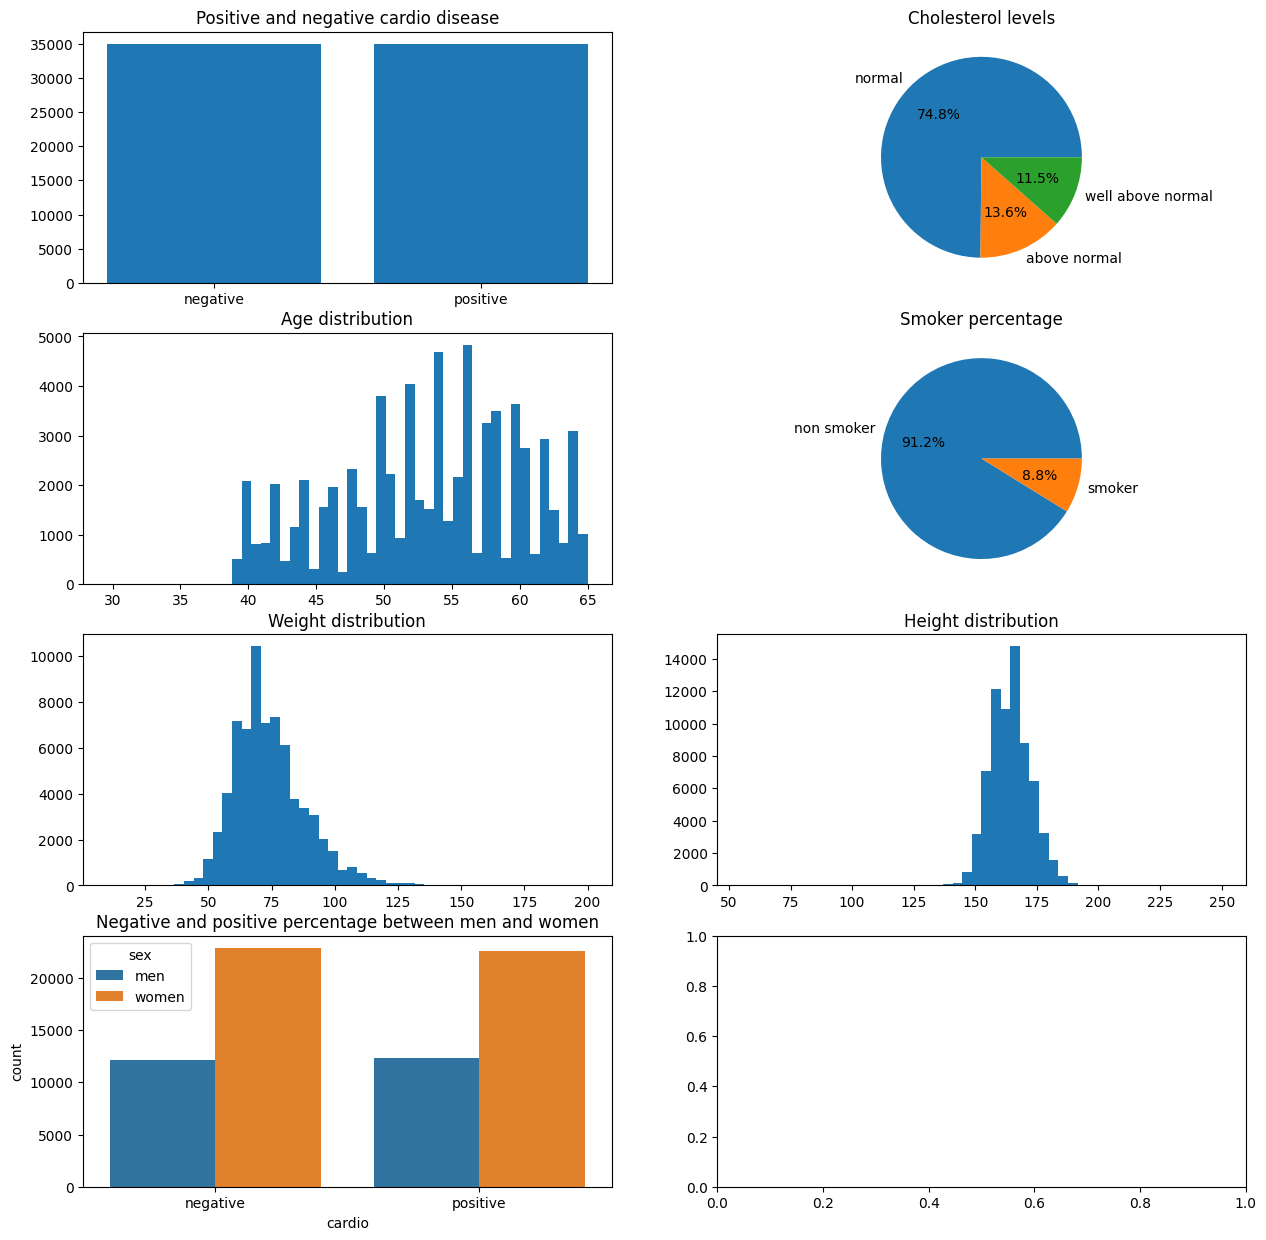

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(15, 15)) # skapar ett typ av fönster 

age = round(df["age"] / 365, 1) # Konvertera kolumnen "age" från dagar till år
cardio = df["cardio"].value_counts().values # Visa hur många patienter som har respektive inte har hjärt- och kärlsjukdom
df["sex"] = df["gender"].map(lambda x : "women" if x == 1 else "men") # Lägg till kolumnen "sex" och omvandla kodade värden 1 och 2 till textetiketter "female" respektive "male"

cardio_labels=["negative", "positive"]
ax[0, 0].bar(cardio_labels, cardio)# Räkna och visa hur många patienter som är negativa respektive positiva för hjärt- och kärlsjukdom
ax[0, 0].set_title("Positive and negative cardio disease")
ax[0, 1].pie(df["cholesterol"].value_counts().values, labels=["normal", "above normal", "well above normal"], autopct= "%1.1f%%")
ax[0, 1].set_title("Cholesterol levels")
ax[1, 0].hist(age, bins=50)
ax[1, 0].set_title("Age distribution")
ax[1, 1].pie(df["smoke"].value_counts().values, labels=["non smoker", "smoker"], autopct= "%1.1f%%")
ax[1, 1].set_title("Smoker percentage")
ax[2, 0].hist(df["weight"], bins=50)
ax[2, 0].set_title("Weight distribution")
ax[2, 1].hist(df["height"], bins=50)
ax[2, 1].set_title("Height distribution")
sns.countplot(data = df, x = "cardio", hue = "sex", ax = ax[3, 0])
ax[3, 0].set_xticklabels(["negative", "positive"])
ax[3, 0].set_title("Negative and positive percentage between men and women")


In [9]:
df["bmi"] = df["weight"] / (df["height"]/100)**2
df["bmi"] = df["bmi"].round(1)

In [ ]:
# Det lägsta och högsta uppmätta BMI-värdet i datasetet är 6.7 respektive 251.1

df = df[(df["bmi"] >= 7) & (df["bmi"] <= 260)]

In [11]:
df["bmi"].min(), df["bmi"].max()

(np.float64(7.0), np.float64(237.8))

In [12]:
bins = [0, 18.4, 24.9, 29.9, 34.9, 39.9, np.inf]
labels = ["Underweight", "Normal weight", "Overweight",
          "Obese Class 1", "Obese Class 2", "Obese Class 3"]
df = df.copy()
df["bmi_categories"] = pd.cut(df["bmi"], bins=bins, labels=labels)

In [13]:
df[df["bmi"] == 18.4]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,sex,bmi,bmi_categories
1067,1484,18133,1,160,47.0,110,70,1,1,0,0,1,0,women,18.4,Underweight
2267,3193,15190,2,179,59.0,110,70,1,1,0,0,1,0,men,18.4,Underweight
3229,4553,15091,1,165,50.0,100,80,1,1,0,0,1,0,women,18.4,Underweight
4961,7022,22639,2,168,52.0,120,80,1,1,0,0,1,0,men,18.4,Underweight
5139,7301,18212,1,165,50.0,110,60,1,1,0,0,1,0,women,18.4,Underweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63976,91336,15357,1,168,52.0,100,70,1,2,0,0,1,0,women,18.4,Underweight
65380,93326,16751,2,168,52.0,120,80,1,1,1,0,1,0,men,18.4,Underweight
65799,93914,21429,2,160,47.0,110,70,1,1,0,0,0,1,men,18.4,Underweight
66837,95428,19564,1,165,50.0,120,70,1,1,0,0,1,0,women,18.4,Underweight


In [14]:
df[df["bmi"]<= 20]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,sex,bmi,bmi_categories
11,16,18815,2,173,60.0,120,80,1,1,0,0,1,0,men,20.0,Normal weight
23,33,23376,2,156,45.0,110,60,1,1,0,0,1,0,men,18.5,Normal weight
80,109,16591,1,159,49.0,120,70,1,1,0,0,1,0,women,19.4,Normal weight
107,142,14499,2,164,48.0,110,70,1,2,1,1,1,1,men,17.8,Underweight
108,143,15440,2,174,54.0,130,80,2,2,0,0,1,1,men,17.8,Underweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69879,99808,21906,1,156,48.0,120,80,1,1,0,0,1,0,women,19.7,Normal weight
69908,99856,14823,1,152,42.0,120,80,1,1,0,0,1,0,women,18.2,Underweight
69912,99861,16002,1,155,48.0,90,70,1,1,0,0,1,0,women,20.0,Normal weight
69919,99871,17312,1,159,45.0,110,70,2,2,0,0,1,0,women,17.8,Underweight


In [ ]:
# Kolumnerna ap_hi och ap_lo representerar systoliskt respektive diastoliskt blodtryck
# Extremvärden finns upp till 370/360
# Blodtryck under 90/60 inkluderas som "Healthy" eftersom det fortfarande kan anses inom normalt intervall


conditions = [
    (df["ap_hi"] < 90) | (df["ap_lo"] < 60),
    (df["ap_hi"] < 120) & (df["ap_lo"] < 80),
    (df["ap_hi"] >= 120) & (df["ap_hi"] < 130) & (df["ap_lo"] < 80),
    ((df["ap_hi"] >= 130) & (df["ap_hi"] < 140)) | ((df["ap_lo"] >= 80) & (df["ap_lo"] < 90)),
    ((df["ap_hi"] >= 140) & (df["ap_hi"] < 180)) | ((df["ap_lo"] >= 90) & (df["ap_lo"] < 120)),
    (df["ap_hi"] >= 180) | (df["ap_lo"] >= 120)
]
 
labels = [
    "Too Risky",
    "Healthy",
    "Elevated",
    "Stage 1 hypertension",
    "Stage 2 hypertension",
    "Hypertension crisis"
]
 
df = df.copy()
df["blood pressure stages"] = np.select(conditions, labels, default="Unknown")
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,sex,bmi,bmi_categories,blood pressure stages
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,men,22.0,Normal weight,Stage 1 hypertension
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,women,34.9,Obese Class 1,Stage 2 hypertension
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,women,23.5,Normal weight,Stage 1 hypertension
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,men,28.7,Overweight,Stage 2 hypertension
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,women,23.0,Normal weight,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,men,26.9,Overweight,Stage 1 hypertension
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,women,50.5,Obese Class 3,Stage 2 hypertension
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,men,31.4,Obese Class 1,Stage 2 hypertension
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,women,27.1,Overweight,Stage 1 hypertension


In [16]:
df = df[(df["ap_hi"] <= 380) & (df["ap_hi"] > 45) & (df["ap_lo"] <= 370) & (df["ap_lo"] > 30) & (df["ap_lo"] < df["ap_hi"])]
 
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,sex,bmi,bmi_categories,blood pressure stages
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,men,22.0,Normal weight,Stage 1 hypertension
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,women,34.9,Obese Class 1,Stage 2 hypertension
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,women,23.5,Normal weight,Stage 1 hypertension
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,men,28.7,Overweight,Stage 2 hypertension
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,women,23.0,Normal weight,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,men,26.9,Overweight,Stage 1 hypertension
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,women,50.5,Obese Class 3,Stage 2 hypertension
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,men,31.4,Obese Class 1,Stage 2 hypertension
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,women,27.1,Overweight,Stage 1 hypertension


Text(0.5, 1.0, 'Blood Pressure Stages')

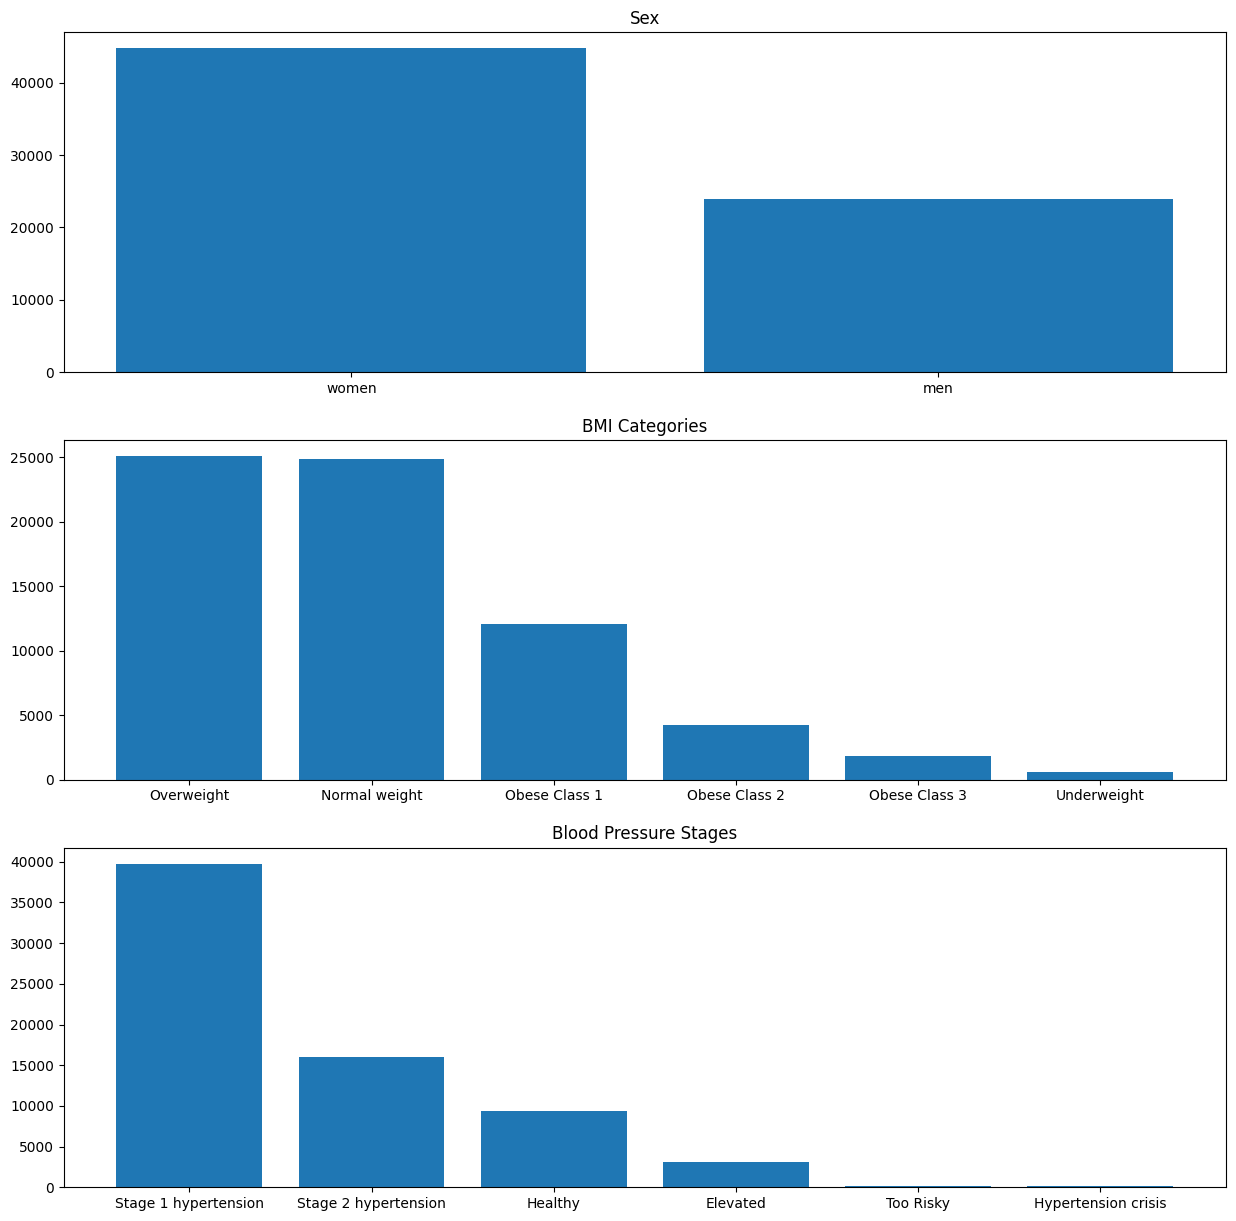

In [17]:
df2= df[df["cardio"] == 1]

fig, ax = plt.subplots(3, 1, figsize =(15, 15))
sex = df["sex"].value_counts()
ax[0].bar(sex.index, sex.values)
ax[0].set_title("Sex")
bmi_categories = df["bmi_categories"].value_counts()
ax[1].bar(bmi_categories.index, bmi_categories.values)
ax[1].set_title("BMI Categories")
blood_pressure_stages = df["blood pressure stages"].value_counts()
ax[2].bar(blood_pressure_stages.index, blood_pressure_stages.values)
ax[2].set_title("Blood Pressure Stages")

In [18]:
nummerical = df.select_dtypes(include="number")
nummerical.corr()["cardio"]
# ju högre blodtryck desto större risk för hjärt- och kärlsjukdomar

id             0.003803
age            0.239405
gender         0.007106
height        -0.010286
weight         0.179785
ap_hi          0.427998
ap_lo          0.340122
cholesterol    0.221438
gluc           0.089583
smoke         -0.016340
alco          -0.008751
active        -0.037431
cardio         1.000000
bmi            0.169299
Name: cardio, dtype: float64

In [19]:
first_df = df.drop(["ap_hi", "ap_lo", "height", "weight", "bmi"], axis=1)
first_df = pd.get_dummies(first_df, columns=["bmi_categories", "blood pressure stages", "sex"], prefix= "Col").astype(int)
first_df

second_df = df.drop(["bmi_categories", "blood pressure stages", "height", "weight"], axis=1)
second_df = pd.get_dummies(second_df, columns= ["sex"], prefix="Col").astype(int)
second_df

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,Col_men,Col_women
0,0,18393,2,110,80,1,1,0,0,1,0,22,1,0
1,1,20228,1,140,90,3,1,0,0,1,1,34,0,1
2,2,18857,1,130,70,3,1,0,0,0,1,23,0,1
3,3,17623,2,150,100,1,1,0,0,1,1,28,1,0
4,4,17474,1,100,60,1,1,0,0,0,0,23,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,120,80,1,1,1,0,1,0,26,1,0
69996,99995,22601,1,140,90,2,2,0,0,1,1,50,0,1
69997,99996,19066,2,180,90,3,1,0,1,0,1,31,1,0
69998,99998,22431,1,135,80,1,2,0,0,0,1,27,0,1


In [29]:
import sys
print(sys.executable)


c:\Program Files\Python312\python.exe


In [39]:
!pip install numpy pandas matplotlib seaborn scikit-learn


Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached scikit_learn-1.7.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.2-cp312-cp312-win_amd64.whl (8.7 MB)
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

X, y = first_df.drop("cardio", axis=1), first_df["cardio"]
X2, y2 = second_df.drop("cardio", axis=1), second_df["cardio"]

x_train, x_test_first, y_train, y_test_first = train_test_split(X, y, test_size=0.25, random_state=42)
x_train_second, x_test_second, y_train_second, y_test_second = train_test_split(X2, y2, test_size=0.25, random_state=42)

x_val, x_test, y_val, y_test = train_test_split(x_test_first, y_test_first, test_size= 0.33, random_state= 43)
x_val_second, x_test_second, y_val_second, y_test_second = train_test_split(x_test_second, y_test_second, test_size= 0.33, random_state= 43)

In [41]:
dec_pipe = Pipeline ([("std_scale", StandardScaler()),
                      ("normal_scale", MinMaxScaler()),
                      ("Dec_Tree", DecisionTreeClassifier())])
para_grid_dec = {"Dec_Tree__max_depth": range (1, 10),
    "Dec_Tree__min_samples_split": [2, 5, 10],
    "Dec_Tree__criterion": ["gini", "entropy"]}

dec_grid = GridSearchCV(dec_pipe, para_grid_dec, cv = 5, scoring = "accuracy")
dec_grid_second = GridSearchCV(dec_pipe, para_grid_dec, cv = 5, scoring = "accuracy")

dec_grid.fit(x_train, y_train)
dec_grid_second.fit(x_train_second, y_train_second)

best_model_dec = dec_grid.best_estimator_
dec_preyd = best_model_dec.predict(x_val)

best_model_dec_second = dec_grid_second.best_estimator_
dec_preyd_second = best_model_dec_second.predict(x_val_second)

dec_1 = F"best params: {dec_grid.best_params_}, \nbest score: {dec_grid.best_score_}, \nclassification_report: {classification_report(y_val, dec_preyd)}"
dec_2 = F"best params: {dec_grid_second.best_params_}, \nbest score: {dec_grid_second.best_score_}, \nclassification_report: {classification_report(y_val_second, dec_preyd_second)}"

In [42]:
from sklearn.ensemble import RandomForestClassifier

ranfocl_pipe = Pipeline ([("std_scale", StandardScaler()),
                           ("normal_scale", MinMaxScaler()),
                           ("randforcla", RandomForestClassifier())])

ranfocl_param = {"randforcla__n_estimators": [100, 150, 200],
                 "randforcla__max_depth": [2, 4, 6, 8, 10]}

ranfocl_grid = GridSearchCV(ranfocl_pipe, ranfocl_param, cv = 5, scoring = "accuracy")
ranfocl_grid_second = GridSearchCV(ranfocl_pipe, ranfocl_param, cv = 5, scoring = "accuracy")

ranfocl_grid.fit(x_train, y_train)
ranfocl_grid_second.fit(x_train_second, y_train_second)

best_model_ranfocl = ranfocl_grid.best_estimator_
ranfocl_preyd =best_model_ranfocl.predict(x_val)

best_model_ranfocl_second = ranfocl_grid_second.best_estimator_
ranfocl_preyd_second =best_model_ranfocl_second.predict(x_val_second)




randforcla_1 = F"best params: {ranfocl_grid.best_params_}, \nbest score: {ranfocl_grid.best_score_}, \n classification report: {classification_report(y_val, ranfocl_preyd)}"
randforcla_2 = F" best params2: {ranfocl_grid_second.best_params_}, \nbest score2: {ranfocl_grid_second.best_score_}, \n classification_report2: {classification_report(y_val_second, ranfocl_preyd_second)}"

KeyboardInterrupt: 

In [44]:
logis_reg_pipe = Pipeline ([("normal_scale", MinMaxScaler()),
                              ("logist_regre", LogisticRegression(max_iter=2000))])

lr_para_grid = {
    "logist_regre__C": [0.01, 0.1, 1, 10, 100],
    "logist_regre__penalty": ["l1", "l2"],
    "logist_regre__solver": ["liblinear", "saga"]}

lr_grid_s = GridSearchCV(logis_reg_pipe, lr_para_grid, cv = 5, scoring = "accuracy")
lr_grid_s_second = GridSearchCV(logis_reg_pipe, lr_para_grid, cv = 5, scoring = "accuracy")

lr_grid_s.fit(x_train, y_train)
lr_grid_s_second.fit(x_train_second, y_train_second)

best_model_log = lr_grid_s.best_estimator_
log_preyd = best_model_log.predict(x_val)

best_model_log_second = lr_grid_s_second.best_estimator_
log_preyd_second = best_model_log_second.predict(x_val_second)


log_1 = F"best params: {lr_grid_s.best_params_}, \nbest score: {lr_grid_s.best_score_}, \nclassification_report:{classification_report(y_val, log_preyd)}" 
log_2 = F"best params2: {lr_grid_s_second.best_params_}, \nbest score2: {lr_grid_s_second.best_score_}, \nclassification_report2:{classification_report(y_val_second, log_preyd_second)}"

KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

logist_votcla = LogisticRegression(C = 1, penalty = "l2", solver = "liblinear", max_iter= 4000)
dec_votcla = DecisionTreeClassifier(criterion = "gini", max_depth = 7, min_samples_split = 2)
randforeclas_votcla = RandomForestClassifier(n_estimators = 200, max_depth = 10, min_samples_leaf = 1)

voti_clas = VotingClassifier(estimators = [
("logist", logist_votcla),
("dec", dec_votcla),
("randforcla", randforeclas_votcla)], voting = "soft")

vot_class_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("normal", MinMaxScaler()),
    ("voting", voti_clas)])

vot_class_pipe.fit(x_train, y_train)
votcla_predict = vot_class_pipe.predict(x_val)

print(accuracy_score(y_val, votcla_predict))

logist_votcla_second = LogisticRegression(C = 1, penalty = "l2", solver = "saga", max_iter= 4000)
dec_votcla_second = DecisionTreeClassifier(criterion = "gini", max_depth = 5, min_samples_split = 2)
randforeclas_votcla_second = RandomForestClassifier(n_estimators = 100, max_depth = 10, min_samples_leaf = 1)

voti_clas_second = VotingClassifier(estimators = [
("logist", logist_votcla_second),
("dec", dec_votcla_second),
("randforcla", randforeclas_votcla_second)], voting = "soft")

vot_class_pipe_second = Pipeline([
    ("scaler", StandardScaler()),
    ("normal", MinMaxScaler()),
    ("voting", voti_clas_second)])

vot_class_pipe_second.fit(x_train_second, y_train_second)
votcla_predict_second = vot_class_pipe_second.predict(x_val_second)

print(accuracy_score(y_val_second, votcla_predict_second))

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y_val, votcla_predict))

In [47]:
print(dec_1)
print(randforcla_1)
print(log_1)

best params: {'Dec_Tree__criterion': 'gini', 'Dec_Tree__max_depth': 7, 'Dec_Tree__min_samples_split': 5}, 
best score: 0.6980447538791126, 
classification_report:               precision    recall  f1-score   support

           0       0.68      0.76      0.72      5780
           1       0.72      0.63      0.67      5721

    accuracy                           0.70     11501
   macro avg       0.70      0.70      0.69     11501
weighted avg       0.70      0.70      0.69     11501



NameError: name 'randforcla_1' is not defined

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay

rand_forclass_pipe = Pipeline([
    ("scaler", MinMaxScaler()),
    ("normal", MinMaxScaler()),
    ("randforclass", RandomForestClassifier())])

rand_forclass_pipe.fit(x_train_second, y_train_second)
y_preyd_ranforcla = rand_forclass_pipe.predict(x_val_second)

print(classification_report(y_val_second, y_preyd_ranforcla))

conf_ranforcla = confusion_matrix(y_val_second, y_preyd_ranforcla)

show_cf = ConfusionMatrixDisplay(confusion_matrix = conf_ranforcla, display_labels = ["Negative (0)", "Positive (1)"])

show_cf.plot(cmap = "Reds")
plt.title(" Confusion Matrix for RandomForestClassifier")
plt.grid(None)
plt.show()

              precision    recall  f1-score   support

           0       0.70      0.73      0.72      5780
           1       0.72      0.69      0.70      5721

    accuracy                           0.71     11501
   macro avg       0.71      0.71      0.71     11501
weighted avg       0.71      0.71      0.71     11501



NameError: name 'confusion_matrix' is not defined